In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Products file reading

In [2]:
path = input("Write full path to the products file: ")
path = path.strip("[]\"'")
products = pd.read_csv(path.replace('\\', '/'))

Write full path to the products file: "C:\Users\hromn\TASKS_FOR_SMART_IT\S_Data\products.csv"


Sellers file reading

In [3]:
path = input("Write full path to the sellers file: ")
path = path.strip("[]\"'")
sellers = pd.read_csv(path.replace('\\', '/'))

Write full path to the sellers file: "C:\Users\hromn\TASKS_FOR_SMART_IT\S_Data\sellers.csv"


Order items file reading

In [4]:
path = input("Write full path to the order items file: ")
path = path.strip("[]\"'")
order_items = pd.read_csv(path.replace('\\', '/'))

Write full path to the order items file: "C:\Users\hromn\TASKS_FOR_SMART_IT\S_Data\order_items.csv"


Data processing

In [5]:
# Grouping the 'order_items' DataFrame by 'seller_id' and counting the number of orders for each seller
sellers_orders = order_items.groupby(['seller_id']).count()

# Merging the 'order_items' DataFrame with the 'sellers' DataFrame based on the 'seller_id' column
merged_df = pd.merge(order_items, sellers, on='seller_id', how='inner')

# Filtering rows where 'seller_id' matches in both DataFrames
filtered_df = merged_df[merged_df['seller_id'].isin(sellers['seller_id'])]

# Calculating the total sum of 'price' and 'freight_value' for each seller
sum_per_seller = filtered_df.groupby('seller_id')[['price', 'freight_value']].sum()

In [6]:
# Sorting the DataFrame by total price in descending order
sum_per_seller_sorted = sum_per_seller.sort_values(by='price', ascending=False)

# Merging the sorted sum_per_seller DataFrame with the original sellers DataFrame to get additional information about sellers
sellers_result = pd.merge(sum_per_seller_sorted, sellers, on='seller_id', how='inner')

# Sorting the DataFrame by total price in ascending order and selecting the top 10 worst sellers
top_10_worst_sellers = sellers_result.sort_values(by='price', ascending=True).head(10)

# Sorting the DataFrame by total price in descending order and selecting the top 10 best sellers
top_10_best_sellers = sellers_result.sort_values(by='price', ascending=False).head(10)

Top 10 best sellers

In [7]:
top_10_best_sellers

,seller_id,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,20168.07,14840,guariba,SP
1,53243585a1d6dc2643021fd1853d8905,222776.05,13080.63,42738,lauro de freitas,BA
2,4a3ca9315b744ce9f8e9374361493884,200472.92,35067.04,14940,ibitinga,SP
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03,10042.70,13170,sumare,SP
4,7c67e1448b00f6e969d365cea6b010ab,187923.89,51612.55,8577,itaquaquecetuba,SP
5,7e93a43ef30c4f03f38b393420bc753a,176431.87,6322.18,6429,barueri,SP
6,da8622b14eb17ae2831f4ac5b9dab84a,160236.57,24955.75,13405,piracicaba,SP
7,7a67c85e85bb2ce8582c35f2203ad736,141745.53,20902.85,3426,sao paulo,SP
8,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55,33892.14,3204,sao paulo,SP
9,955fee9216a65b617aa5c0531780ce60,135171.70,25430.98,4782,sao paulo,SP


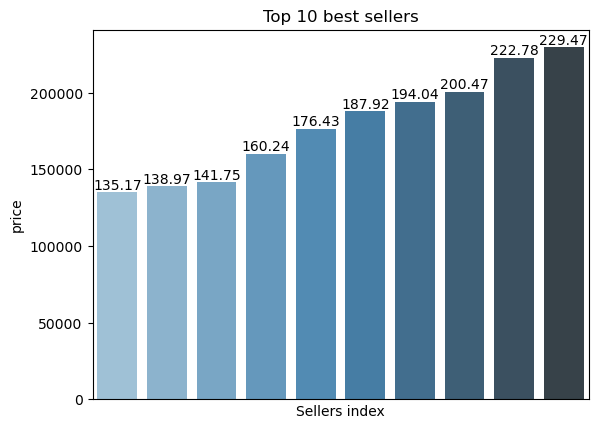

In [8]:
prices = top_10_best_sellers['price']

sns.barplot(x=top_10_best_sellers.index,
            y='price', 
            data=top_10_best_sellers[::-1], 
            palette='Blues_d')

plt.xlabel('Sellers index')
plt.ylabel('price')
plt.title('Top 10 best sellers')
plt.xticks([])

# Adding a legend for each column
for i, price in enumerate(prices[::-1]):
    plt.text(i, price, f'{price/ 1000:.2f}', ha='center', va='bottom')

    
plt.show()

Top 10 worst sellers

In [9]:
top_10_worst_sellers 

,seller_id,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
3094,cf6f6bc4df3999b9c6440f124fb2f687,3.50,8.72,4937,sao paulo,SP
3093,77128dec4bec4878c37ab7d6169d6f26,6.50,8.72,2610,sao paulo,SP
3092,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,9.00,4106,sao paulo,SP
3091,702835e4b785b67a084280efca355756,7.60,10.96,36046,juiz de fora,MG
3090,34aefe746cd81b7f3b23253ea28bef39,8.00,14.52,81210,curitiba,PR
3089,ad14615bdd492b01b0d97922e87cb87f,8.25,10.96,88704,tubarao,SC
3088,4965a7002cca77301c82d3f91b82e1a9,8.49,7.87,18074,sorocaba,SP
3087,0f94588695d71662beec8d883ffacf09,9.00,18.59,88037,florianopolis,SC
3086,c18309219e789960add0b2255ca4b091,9.90,14.10,20521,rio de janeiro,RJ
3085,95cca791657aabeff15a07eb152d7841,9.99,18.23,85950,palotina,PR


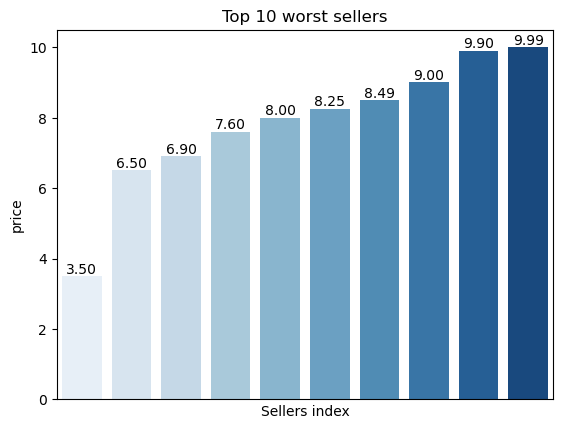

In [10]:
prices = top_10_worst_sellers ['price']

sns.barplot(x=top_10_worst_sellers.index,
            y='price', 
            data=top_10_worst_sellers[::-1], 
            palette='Blues',
           )

plt.xlabel('Sellers index')
plt.ylabel('price')
plt.title('Top 10 worst sellers')
plt.xticks([])

# Adding a legend for each column
for i, price in enumerate(prices):
    plt.text(i, price, f'{price:.2f}', ha='center', va='bottom')

    
plt.show()

Best sellers in each category

In [11]:
# Merging the "order_items" and "sellers" tables based on the 'seller_id' column
merged_data = pd.merge(order_items, sellers, on='seller_id', how='left')

# Merging the obtained data with the "products" table based on the 'product_id' column
merged_data = pd.merge(merged_data, products, on='product_id', how='left')

# Grouping the data by product categories
grouped_data = merged_data.groupby('product_category_name')

# Creating an empty list to store the best sellers in each category
best_sellers_by_category = []

# Finding the best seller in each category
for category, group in grouped_data:
    # Finding the seller with the highest total price of products sold in the category
    best_seller = group.groupby('seller_id')['price'].sum().idxmax()
    best_sellers_by_category.append({'Category': category, 'Best seller ID': best_seller})

# Creating a DataFrame with the results
df_best_sellers = pd.DataFrame(best_sellers_by_category)


df_best_sellers

,Category,Best seller ID
0,agro_industria_e_comercio,e59aa562b9f8076dd550fcddf0e73491
1,alimentos,cbd996ad3c1b7dc71fd0e5f5df9087e2
2,alimentos_bebidas,a3dd39f583bc80bd8c5901c95878921e
3,artes,c31eff8334d6b3047ed34bebd4d62c36
4,artes_e_artesanato,55f7a3319d80f7fdf078b8f03e6725fe
...,...,...
68,sinalizacao_e_seguranca,55d3daac7c404d59e51c2aa2f4dc5a23
69,tablets_impressao_imagem,0db783cfcd3b73998abc6e10e59a102f
70,telefonia,53243585a1d6dc2643021fd1853d8905
71,telefonia_fixa,b37c4c02bda3161a7546a4e6d222d5b2


In [12]:
category = input('Write a category name to find the best seller:')
df_best_sellers[df_best_sellers['Category'] == category]

Write a category name to find the best seller:telefonia


,Category,Best seller ID
70,telefonia,53243585a1d6dc2643021fd1853d8905


Best products for each category

In [13]:
# Create a new table in which for each order is data product_id 
products_with_orders = pd.merge(products, order_items, on='product_id', how='inner')

# Group the merged DataFrame by 'product_category_name' and count the number of unique product IDs in each category
products_category = products_with_orders.groupby('product_category_name')['product_id'].count()

# Create an empty DataFrame to store the results
best_products = pd.DataFrame(columns=[
    'product_category_name', 
    'First best product ID',
    '1 amount',
    'Second best product ID',
    '2 amount',
    'Third best product ID',
    '3 amount',
])


for category in products_category.index:
    # Filter the merged DataFrame to include only rows with the current category
    category_data = products_with_orders[products_with_orders['product_category_name'] == category]
    
     # Group the filtered DataFrame by 'product_id' and count the occurrences of each product
    product_sales = category_data.groupby('product_id').size().sort_values(ascending=False)
    
    # Get the top three best-selling products in the category
    top_three_products = product_sales.head(3).index.tolist()
    
    if len(top_three_products) < 3:
        top_three_products += [None] * (3 - len(top_three_products))
        
    best_products = best_products.append({
        'product_category_name': category,
        'First best product ID': f"{top_three_products[0]}",
        '1 amount':(product_sales[top_three_products[0]] if top_three_products[0] else None),
        'Second best product ID': f"{top_three_products[1]}",
        '2 amount':(product_sales[top_three_products[1]] if top_three_products[1] else None),
        'Third best product ID': f"{top_three_products[2]}",
        '3 amount':(product_sales[top_three_products[2]] if top_three_products[2] else None),
    }, ignore_index=True)



C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Tem

C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Temp\ipykernel_20192\1505236981.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_products = best_products.append({
C:\Users\hromn\AppData\Local\Tem

In [14]:
best_products

,product_category_name,First best product ID,1 amount,Second best product ID,2 amount,Third best product ID,3 amount
0,agro_industria_e_comercio,11250b0d4b709fee92441c5f34122aed,22,423a6644f0aa529e8828ff1f91003690,18,672e757f331900b9deea127a2a7b79fd,17
1,alimentos,89321f94e35fc6d7903d36f74e351d40,119,ed2067a9c1f79553088a3c67b99a9f97,55,73326828aa5efe1ba096223de496f596,54
2,alimentos_bebidas,84f5c4f480ad6c9998d6a6860f1a2e41,24,ec96b7b4e1401281edb9465d0d689cae,17,54b755678728b84472c2b654ac4de777,14
3,artes,4fe644d766c7566dbc46fb851363cb3b,107,986700c98805af229ab7ad51b95fa356,7,bf359473d58e90d8fc29bf8f3d282ea9,7
4,artes_e_artesanato,b9976e9c22fb1540bd71d1bcd2989475,5,43f224fb79bae5b22585eb868fe3b84b,2,08c5c3d471845327e913b52aded0caf3,1
...,...,...,...,...,...,...,...
68,sinalizacao_e_seguranca,150c699262a053229e89213dc9c358d2,11,0c8b6b6e4f9ee5fe2c48d6cee4c69bc8,9,7d8e924f1da646ec896e1c0a80ef2f99,8
69,tablets_impressao_imagem,6bbe55cf8f85c87b6eebb775a53402f4,33,34dabb8af33b3756cf72df05fb327011,20,2eb9b2ef7c1da3c7b99702452ea4729f,17
70,telefonia,e7cc48a9daff5436f63d3aad9426f28b,93,c9c6fde711572c1ad99ca12728c6af00,79,97017430754804328eb9597b7f85da03,69
71,telefonia_fixa,913580fde3e72c3b3e4ce0b79963bee6,18,b4f9530c931398e215242293c2c8ba4c,14,4633dfeb3a2588bdb52af32d504b44eb,12


Write a category name: telefonia


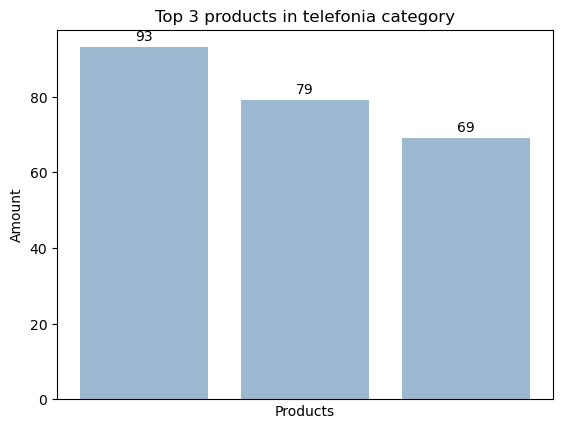

,product_category_name,First best product ID,1 amount,Second best product ID,2 amount,Third best product ID,3 amount
70,telefonia,e7cc48a9daff5436f63d3aad9426f28b,93,c9c6fde711572c1ad99ca12728c6af00,79,97017430754804328eb9597b7f85da03,69


In [15]:
category = input("Write a category name: ")

category_products = best_products[best_products['product_category_name'] == category]

category_products

# Extracting the values of the top three products' amounts
values = [
    int(category_products['1 amount']),
    int(category_products['2 amount']),
    int(category_products['3 amount']),
]

plt.xticks([])
plt.bar(range(3), values,color='#9cb9d1')
plt.xlabel('Products')
plt.ylabel('Amount')
plt.title(f'Top 3 products in {category} category')

# Giving product amount for each column
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.show()

category_products

Dependence of the price of the products on their weight

In [16]:
average_prices = order_items.groupby('product_id')['price'].mean().reset_index()

merged_data = pd.merge(products, average_prices, on='product_id', how='inner')

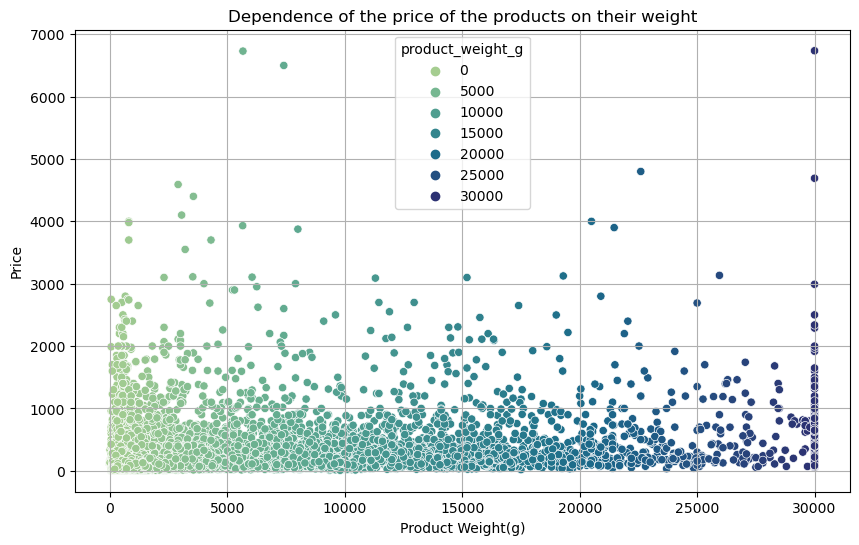

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_weight_g',
                y='price', 
                hue='product_weight_g',  
                palette='crest',
                data=merged_data[merged_data['product_weight_g'] < 30500],
               )

plt.xlabel('Product Weight(g)')
plt.ylabel('Price')
plt.title('Dependence of the price of the products on their weight')
plt.grid(True)
plt.show()
